# Clustering - Exploration Exercise
Create either a python script or a jupyter notebook named explore_tips that explores the tips data set that is built in to seaborn. Perform at least 1 t-test and 1 chi square test.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats

In [2]:
df = sns.load_dataset("tips")

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [5]:
df.describe(include="all")

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


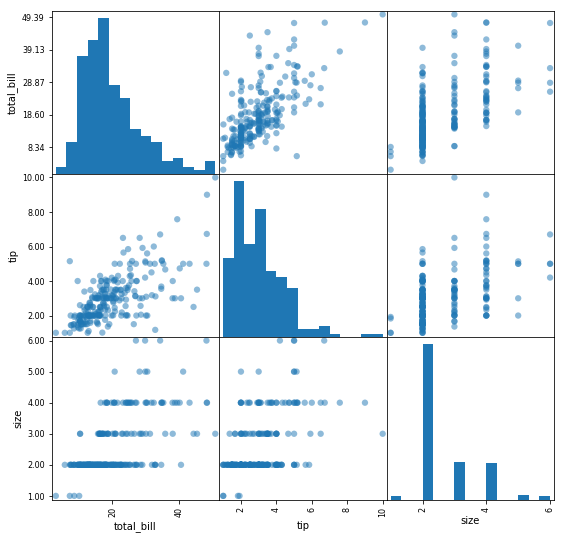

In [6]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter

cmap = cm.get_cmap('gnuplot')
axes = pd.scatter_matrix(
    df, marker='o', s=40,
    hist_kwds={'bins':15},  figsize=(9,9), cmap=cmap)
for ax in axes.flatten():
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

## Compare tip amount of male and female customers (T-test)

**H0: There is no difference in tip amount between male and female customers**

I would fail to reject the null hypothesis because the p-value is greater than 0.05.

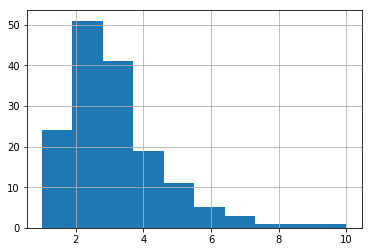

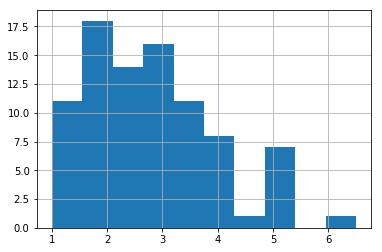

In [7]:
df_male = df[df.sex == "Male"]
df_female = df[df.sex == "Female"]

df_male.tip.hist()
plt.show()
df_female.tip.hist()
plt.show()

In [8]:
t_stat, p_val = stats.ttest_ind(df_male.tip, df_female.tip)
print(f"T-stat: {t_stat}\np-val: {p_val}")

T-stat: 1.3878597054212687
p-val: 0.16645623503456763


## Compare tip amount of male and female customers (T-test)

**H0: the day of the week and the time of the meal are independent of each other**

I would fail to reject the null hypothesis because the p-value is greater than 0.05

In [9]:
df['spending_bin'] = pd.qcut(df.tip, 4, labels=False)

tbl = pd.crosstab(df.sex, df.spending_bin)
tbl

stat, p, dof, expected = stats.chi2_contingency(tbl)

In [10]:
print(f"Chi2: {stat}\np-val: {p}")

Chi2: 2.097587406614422
p-val: 0.5524010015985761


In [11]:
tbl

spending_bin,0,1,2,3
sex,,,,
Male,50,25,39,43
Female,28,19,22,18
